In [14]:
import numpy as np
from fbm import FBM
import matplotlib.pyplot as plt
from mf_dfa import mf_dfa
from mf_dfa.fitting import polyfit
from scipy.optimize import minimize
%matplotlib inline

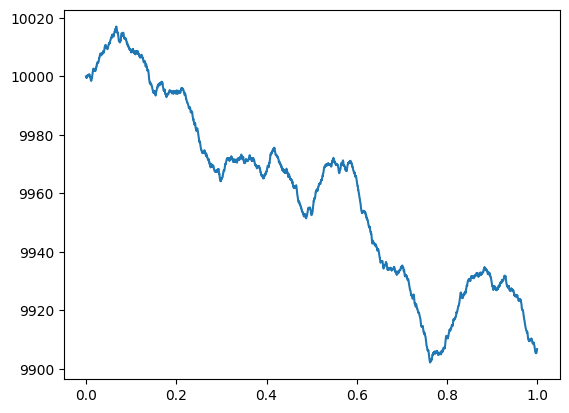

In [2]:
f = FBM(n=3653, hurst=0.75, length=1)

fbm_sample = (100.+f.fbm())*100.0

t_values = f.times()

fig, ax = plt.subplots()

ax.plot(t_values, fbm_sample)

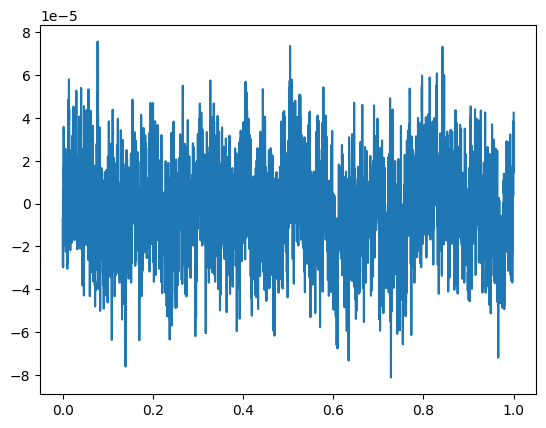

In [3]:
x=np.log(fbm_sample[1:])-np.log(fbm_sample[:-1])
fig, ax = plt.subplots()

ax.plot(t_values[1:], x)

In [4]:
q = np.arange(-10, 11, 1)
q = q[q!=0.]

lags = np.arange(50, len(x)//4)

f = mf_dfa(x=x, lags=lags, order=1, q=q)

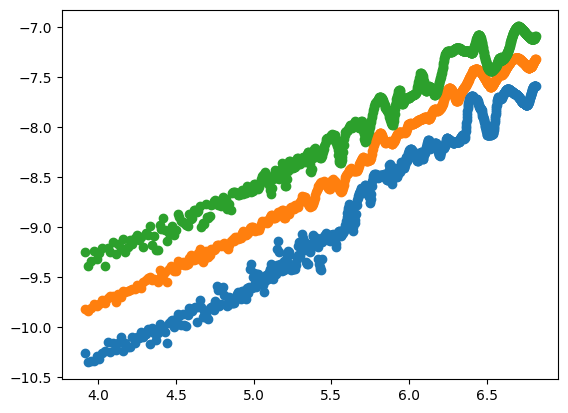

In [5]:
plt.scatter(np.log(lags), np.log(f[:, 0]))
plt.scatter(np.log(lags), np.log(f[:, 10]))
plt.scatter(np.log(lags), np.log(f[:, 19]))

In [8]:
h_q = polyfit(np.log(lags), np.log(f),deg=1)[0,:]

Text(0.5, 0, '$q$')

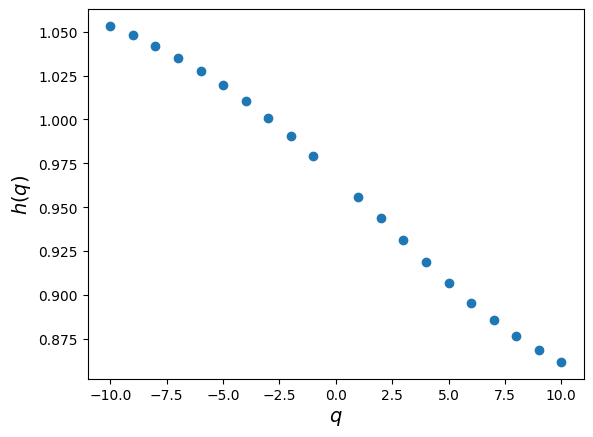

In [23]:
fig, ax = plt.subplots()

ax.scatter(q, h_q)

ax.set_ylabel(r"$h(q)$", fontsize=14)
ax.set_xlabel(r"$q$", fontsize=14)

In [10]:
from findiff import FinDiff

tau_q = h_q * q - 1

d_dq = FinDiff(0, 1, 1)

alpha_q = d_dq(tau_q)

f_alpha_q = q*alpha_q - tau_q

Text(0.5, 0, '$\\alpha$')

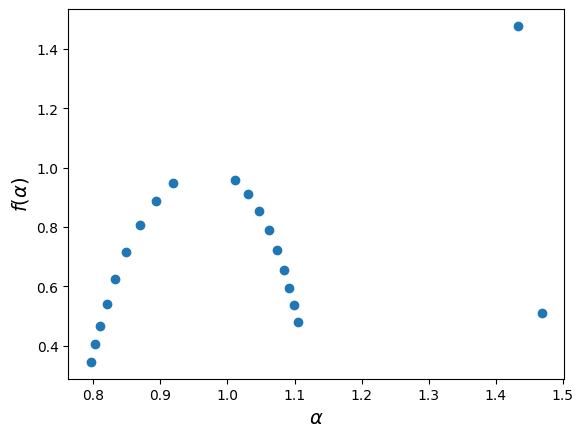

In [22]:
fig, ax = plt.subplots()

ax.scatter(alpha_q, f_alpha_q)

ax.set_ylabel(r"$f(\alpha)$", fontsize=14)
ax.set_xlabel(r"$\alpha$", fontsize=14)

Text(0.5, 0, '$\\alpha$')

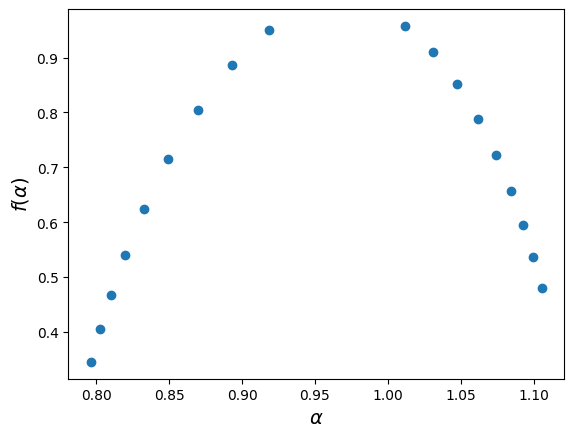

In [21]:
# Remove outliers

alpha_q_wo_outliers = alpha_q[alpha_q.argsort()[:-2]]
f_alpha_q_wo_outliers = f_alpha_q[alpha_q.argsort()[:-2]]

fig, ax = plt.subplots()

ax.scatter(alpha_q_wo_outliers, f_alpha_q_wo_outliers)

ax.set_ylabel(r"$f(\alpha)$", fontsize=14)
ax.set_xlabel(r"$\alpha$", fontsize=14)

In [13]:
rmse_fun = lambda c: np.mean(
    (
        (
            c[1] + 
            c[2] * (alpha_q_wo_outliers - c[0]) + 
            c[3] * (alpha_q_wo_outliers - c[0])**2 + 
            c[4]*(alpha_q_wo_outliers - c[0])**3 + 
            c[5]*(alpha_q_wo_outliers - c[0])**4
        ) -
        f_alpha_q_wo_outliers
    )**2
)**(0.5)

In [15]:
res = minimize(rmse_fun, (0.75, 0.1, 0.1, 0.1, 0.1, 0.1))

In [16]:
res.x

array([   0.57027974,   -6.43788108,   63.73310891, -218.39562628,
        361.68004264, -244.74131866])

In [17]:
fun = lambda c: (
            c[1] + 
            c[2] * (alpha_q_wo_outliers - c[0]) + 
            c[3] * (alpha_q_wo_outliers - c[0])**2 + 
            c[4]*(alpha_q_wo_outliers - c[0])**3 + 
            c[5]*(alpha_q_wo_outliers - c[0])**4
        )

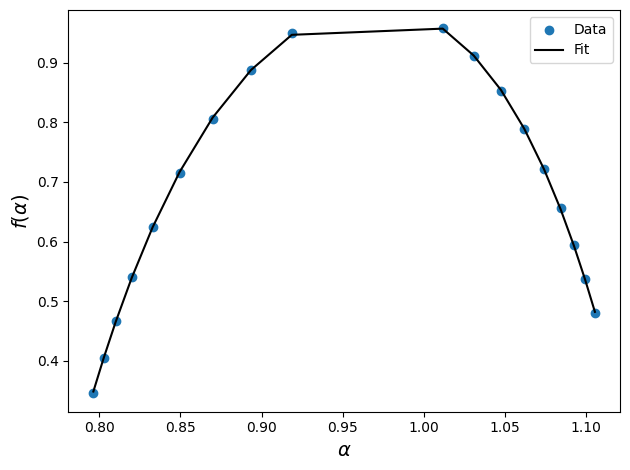

In [24]:
fig, ax = plt.subplots()

ax.scatter(alpha_q_wo_outliers, f_alpha_q_wo_outliers, label="Data")

ax.plot(alpha_q_wo_outliers, fun(res.x), c="k", linewidth=1.5, label="Fit")

ax.set_ylabel(r"$f(\alpha)$", fontsize=14)
ax.set_xlabel(r"$\alpha$", fontsize=14)

ax.legend()

fig.tight_layout()